In [1]:
import gurobipy as gp
from gurobipy import GRB, quicksum
import pandas as pd
import numpy as np
import math
from src.OpfModel import add_opf_constraints
from src.ThermalModel import add_indoor_constraints
from src.HHPmodel import add_hhp_constraints
from src.Model import build_model
from src.ModelConfig import Config, save_model_info
from src.Parameter import get_model_inf

In [2]:
def read_power_data(file_path):
    df = pd.read_csv(file_path)
    # df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y %I:%M %p')
    # return df[df['date'].dt.date == pd.to_datetime("2024-02-11").date()].reset_index(drop=True)
    return df
LoadPower = pd.read_csv("data/user_load.csv")
p_baseload=LoadPower.iloc[0,1:]*1E-3
p_baseload=p_baseload.tolist()
# p_baseload=LoadPower['usage_total_pu'].values/10
# p_baseload=p_baseload.tolist()
# p_baseload[95]
p_baseload

[0.000431068172,
 0.00019214082199999998,
 0.00010429565300000001,
 0.00017652059100000002,
 0.00017193177500000002,
 0.000136049381,
 -7.2370688e-05,
 0.00022563182600000001,
 0.000888947395,
 9.6045611e-05,
 5.4116976e-05,
 0.00011241048300000001,
 0.00015343774600000003,
 0.00016070115099999998,
 0.000168666669,
 0.002189666672,
 0.000432864861,
 8.1947819e-05,
 0.000172489379,
 0.000241358051,
 0.000382113494,
 0.00010108695800000001,
 0.000231658009,
 0.00010048935900000001,
 0.00010298457599999999,
 0.000246209764,
 0.00024133334,
 0.000157268295,
 6.097752800000001e-05,
 0.00031283251699999997,
 6.778261100000001e-05,
 0.000104888888,
 0.000185247192,
 0.000219277304,
 0.000128723798,
 0.000118609757,
 0.0]

In [2]:
model_inf = get_model_inf()
Time_day =96

In [3]:
model_inf.congestion_limit


array([-0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 ,
       -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 ,
       -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 ,
       -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 ,
       -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 ,
       -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 ,
       -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 ,
       -0.2 , -0.2 , -0.2 , -0.2 , -0.05, -0.05, -0.05, -0.05, -0.05,
       -0.05, -0.05, -0.05, -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 ,
       -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 ,
       -0.2 , -0.2 , -0.2 , -0.2 , -0.2 , -0.2 ])

In [4]:

m,dict_optimizedResults = build_model(Time_day,model_inf, add_opf_constraints, add_hhp_constraints, add_indoor_constraints)



Set parameter Username
Set parameter LicenseID to value 2617326
Academic license - for non-commercial use only - expires 2026-02-03
Optimization Runtime: 600.6389999389648 seconds
Model status: 9


In [5]:
df_cost = pd.DataFrame({
    'power_cost': [dict_optimizedResults["power_cost"]],
    'gas_cost': [dict_optimizedResults["gas_cost"]],
    'PPD_cost': [dict_optimizedResults["PPD_cost"]]
    })
df_cost

,power_cost,gas_cost,PPD_cost
0,266.293441,1058.267698,7592.300577


In [4]:
# m.setParam("LogFile", "solver_log.txt")
# m.optimize()
# Initialize configuration (custom directory and file settings)
cfg = Config(output_dir="Config", save_lp=False, save_sol=False, save_ilp=True)
# Save model information based on the configuration
save_model_info(m, cfg)

NameError: name 'm' is not defined

In [4]:
#change the output name

# print(dict_optimizedResults)
Result_p = dict_optimizedResults["p"]
Result_q = dict_optimizedResults["q"]
Result_v= dict_optimizedResults["v_value"]
Result_hp = dict_optimizedResults["p_hp"]
Result_pv_down = dict_optimizedResults["p_pv_down"]
Result_pv = dict_optimizedResults["p_pv"]
Result_T_ind = dict_optimizedResults["T_ind"]
Result_h_boil = dict_optimizedResults["h_boil"]
Result_PPD = dict_optimizedResults["PPD"]

In [6]:
print("total power")
print(Result_p[0])
print("Indoor Tem:")
print(Result_T_ind)
print("Gas:")
print(Result_h_boil[0])
print("hp:")
# print(Result_hp)
print(Result_hp[0])
print("PPD:")
print(Result_PPD)

total power
[-0.042411323612380876, -0.047371000922122146, -0.046960665473234256, -0.045486188064457915, -0.043389395862443766, -0.04738590561079882, -0.043311168691802876, -0.0422517265104227, -0.041767312148867954, -0.04659478806669113, -0.047509224179491674, -0.04193616809918492, -0.04100484884048324, -0.04205515064386318, -0.04731037682123415, -0.04440395711263481, -0.04756724110175834, -0.04800143443323594, -0.04772608430277008, -0.045449989809692753, -0.04762099768304675, -0.04737620662805923, -0.045542251230082535, -0.04583351977026555, -0.04831508760844335, -0.04553529824507722, -0.0467178918138008, -0.04768671854394959, -0.045935606398869434, -0.04163368331961339, -0.04680472676734138, -0.04549267381700535, -0.04290840383999526, -0.04255474004345456, -0.0437295674409816, -0.042320698977994786, -0.043858346853079815, -0.04283313179415475, -0.04446953721154935, -0.04537035083064177, -0.0398575564720731, -0.047671159091632394, -0.048232040132514295, -0.043752675473351814, -0.0475

In [ ]:
print(f"The optimal objective value is: {m.objVal}")

The optimal objective value is: 1144.222756733108


In [5]:

Result_p_array = np.array(Result_p)
Result_q_array = np.array(Result_q)
Result_v_array = np.array(Result_v)
Result_T_ind_array = np.array(Result_T_ind)
Result_hp_array = np.array(Result_hp)
Result_h_boil_array = np.array(Result_h_boil)
Result_PPD_array = np.array(Result_PPD)
#hp
hp_sum = 1E3*np.sum(Result_hp_array, axis=0)
hp_out= 1E3*np.sum(Result_hp_array, axis=1)
h_boil_sum = 1E3*np.sum(Result_h_boil_array, axis=0)
# voltage
for i in range(len(Result_v_array)):
    for j in range(len(Result_v_array[i])):
        Result_v_array[i][j] = math.sqrt(Result_v_array[i][j])/0.23

Result_v_min = []
Result_v_max = []
for i in range(96):
    # Extract i-th values across all subarrays
    values_at_i = [Result_v_array[j][i] for j in range(len(Result_v_array))]
    Result_v_min.append(min(values_at_i))
    Result_v_max.append(max(values_at_i))


In [6]:
df_h_boil = pd.DataFrame(Result_h_boil_array)
df_T_ind = pd.DataFrame(Result_T_ind_array)
df_PPD = pd.DataFrame(Result_PPD_array)
df_hp = pd.DataFrame(Result_hp_array)

# 写入 Excel 文件的不同 sheet
with pd.ExcelWriter('result/ResultArrays8.xlsx', engine='xlsxwriter') as writer:
    df_h_boil.to_excel(writer, sheet_name='h_boil', index=False)
    df_T_ind.to_excel(writer, sheet_name='T_ind', index=False)
    df_PPD.to_excel(writer, sheet_name='PPD', index=False)
    df_hp.to_excel(writer, sheet_name='hp', index=False)

In [21]:
hp_out

array([238.04389638,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  62.49900795, 352.62002081,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  56.04035833,   0.        ,
        54.01275229,  89.99999508,  74.95333325,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
       236.33992174, 237.19851139,   0.        ,   0.        ,
       338.90558457,   0.        ,   0.        ,   0.        ,
       311.9487318 ,   0.        , 152.41916102,   0.        ,
         0.        ])

In [6]:
Total_power = []
Total_power.append(model_inf.LoadPower.iloc[:,1:].sum(axis=1))
Total_hp=[]
Total_hp_out=[]
Total_PPD=[]
Total_indoor = []
v_min=[]
v_max=[]

In [7]:
Total_power.append(-1E3*Result_p_array[0])
Total_hp.append(hp_sum)
Total_hp_out.append(hp_out)
Total_PPD.append(Result_PPD[0])
Total_indoor.append(Result_T_ind_array[0])
v_min.append(Result_v_min)
v_max.append(Result_v_max)

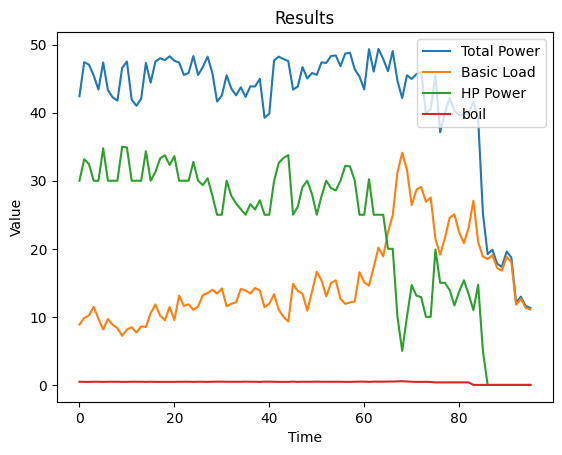

In [8]:
import matplotlib.pyplot as plt
plt.plot(Total_power[1], label='Total Power')
#plot the sum of all users in model_inf.LoadPower in each time step
plt.plot(Total_power[0], label='Basic Load')
# plt.plot(Result_T_ind[0], label='Result_T_ind[0]')
#plot total Result_h_boil
plt.plot(hp_sum,label='HP Power')
plt.plot(h_boil_sum, label='boil')
# plt.plot(Result_PPD[0], label='Result_PPD[0]')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Results')
plt.legend()    
plt.show()


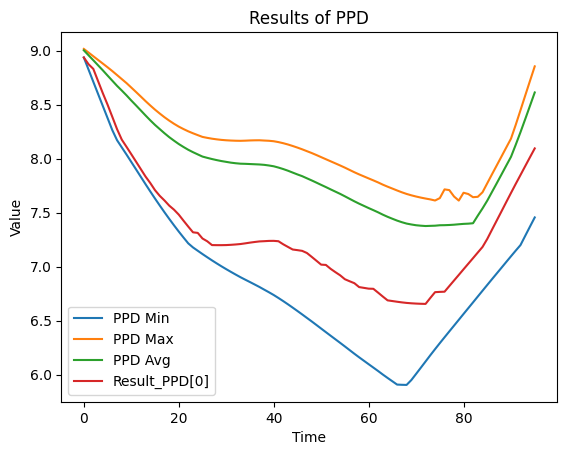

In [10]:
# draw the result of Result_PPD[0]
# get the min and max and average of Result_PPD_array in each time step
ppd_min = np.min(Result_PPD_array, axis=0)
ppd_max = np.max(Result_PPD_array, axis=0)
ppd_avg = np.mean(Result_PPD_array, axis=0)
plt.plot(ppd_min, label='PPD Min')
plt.plot(ppd_max, label='PPD Max')
plt.plot(ppd_avg, label='PPD Avg')
plt.plot(Result_PPD[0], label='Result_PPD[0]')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Results of PPD')
plt.legend()



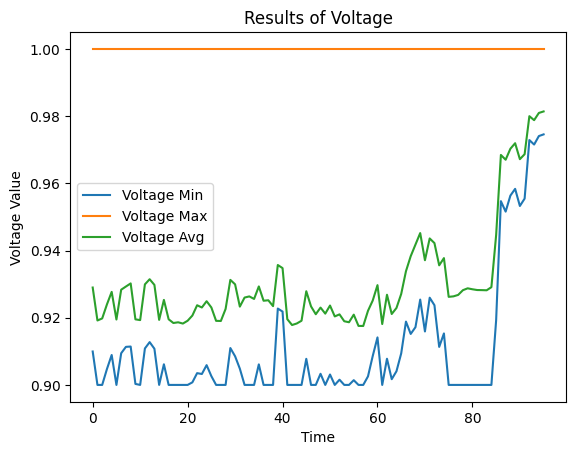

In [11]:
#Result_v_array min max and averag
vol_min = np.min(Result_v_array, axis=0)
vol_max = np.max(Result_v_array, axis=0)
vol_avg = np.mean(Result_v_array, axis=0)
plt.plot(vol_min, label='Voltage Min')  
plt.plot(vol_max, label='Voltage Max')
plt.plot(vol_avg, label='Voltage Avg')
plt.xlabel('Time')
plt.ylabel('Voltage Value')
plt.title('Results of Voltage')
plt.legend()

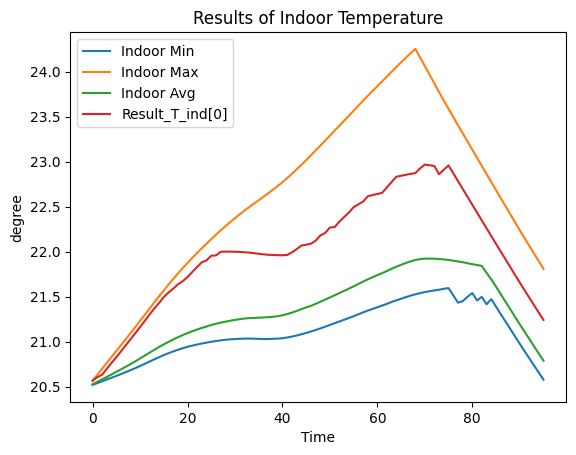

In [9]:
#Result_T_ind_array min max and average
T_ind_min = np.min(Result_T_ind_array, axis=0)
T_ind_max = np.max(Result_T_ind_array, axis=0)
T_ind_avg = np.mean(Result_T_ind_array, axis=0)
plt.plot(T_ind_min, label='Indoor Min')
plt.plot(T_ind_max, label='Indoor Max')
plt.plot(T_ind_avg, label='Indoor Avg')
plt.plot(Result_T_ind[0], label='Result_T_ind[0]')
plt.xlabel('Time')
plt.ylabel('degree')
plt.title('Results of Indoor Temperature')
plt.legend()

In [14]:
#save the result in excel for each case

with pd.ExcelWriter('result/12kW.xlsx', engine='xlsxwriter') as writer:
    # Sheet: ind
    df_ind = pd.DataFrame({
        'T_ind_min': T_ind_min,
        'T_ind_max': T_ind_max,
        'T_ind_avg': T_ind_avg,
        'Result_T_ind[0]': Result_T_ind[0]
    })
    df_ind.to_excel(writer, sheet_name='ind', index=False)

    # Sheet: vol
    df_vol = pd.DataFrame({
        'vol_min': vol_min,
        'vol_max': vol_max,
        'vol_avg': vol_avg
    })
    df_vol.to_excel(writer, sheet_name='vol', index=False)

    # Sheet: ppd
    df_ppd = pd.DataFrame({
        'ppd_min': ppd_min,
        'ppd_max': ppd_max,
        'ppd_avg': ppd_avg,
        'Result_PPD[0]': Result_PPD[0]
    })
    df_ppd.to_excel(writer, sheet_name='ppd', index=False)

    # Sheet: HP
    df_hp = pd.DataFrame({'hp_out': hp_out})
    df_hp.to_excel(writer, sheet_name='HP', index=False)

    # Sheet: power
    df_power = pd.DataFrame({
        'hp_sum': hp_sum,
        'Total_power_0': Total_power[0],
        'Total_power_1': Total_power[1]
    })
    df_power.to_excel(writer, sheet_name='power', index=False)
    # Sheet: cost
    df_cost = pd.DataFrame({
    'power_cost': [dict_optimizedResults["power_cost"]],
    'gas_cost': [dict_optimizedResults["gas_cost"]],
    'PPD_cost': [dict_optimizedResults["PPD_cost"]]
    })
    df_cost.to_excel(writer, sheet_name='cost', index=False)

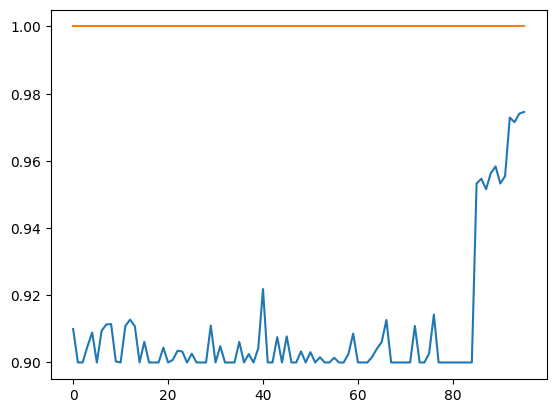

In [15]:
# for every element in Result_v_array, calculate the sqrt and /0.23 to get the p.u. voltage value

# Result_v_array
#calculate shape of the Result_v_array
#Result_v_array[i][j] calculate the min and max of each i and store in Result_v_min and Result_v_max
Result_v_min = []
Result_v_max = []
for i in range(96):
    # Extract i-th values across all subarrays
    values_at_i = [Result_v_array[j][i] for j in range(len(Result_v_array))]
    Result_v_min.append(min(values_at_i))
    Result_v_max.append(max(values_at_i))
#plot the Result_v_min and Result_v_max
import matplotlib.pyplot as plt
plt.plot(Result_v_min)
plt.plot(Result_v_max)
plt.show()







In [ ]:
#pf validate


from pandapower.plotting import simple_plot 
import pandapower as pp



def epse_feeder(t):

    net = pp.create_empty_network()
    pp.set_user_pf_options(net, algorithm='nr', init_vm_pu = "flat", init_va_degree = "dc", calculate_voltage_angles = True) 
    n_bus = 87
    # create buses
    for i in range(n_bus): 
        globals()['b{}'.format(i)] = pp.create_bus(net, 0.23, name = "b{}".format(i))          
    # slack bus
    pp.create_ext_grid(net, globals()['b0'], s_sc_max_kva=400,rx_max=0.1,r0x0_max= 0.1,x0x_max=1.0)
    # create standard lines
    # data from Vision
 
    pp.create_std_type(net, {"c_nf_per_km": 430, "r_ohm_per_km": 1.91, "x_ohm_per_km": 0.096,\
                             "c0_nf_per_km": 260, "r0_ohm_per_km": 4.65, "x0_ohm_per_km": 0.16,\
                             "max_i_ka": 0.075}, name = "16Al", element = "line")

    pp.create_std_type(net, {"c_nf_per_km": 540, "r_ohm_per_km": 0.641, "x_ohm_per_km": 0.085,\
                             "c0_nf_per_km": 320, "r0_ohm_per_km": 1.65, "x0_ohm_per_km": 0.15,\
                             "max_i_ka": 0.14}, name = "50Al", element = "line")
    pp.create_std_type(net, {"c_nf_per_km": 660, "r_ohm_per_km": 0.32, "x_ohm_per_km": 0.082,\
                             "c0_nf_per_km": 400, "r0_ohm_per_km": 0.91, "x0_ohm_per_km": 0.15,\
                             "max_i_ka": 0.22}, name = "95Al", element = "line")
    pp.create_std_type(net, {"c_nf_per_km": 200, "r_ohm_per_km": 3.061, "x_ohm_per_km": 0.1,\
                             "c0_nf_per_km": 120, "r0_ohm_per_km": 7.82, "x0_ohm_per_km": 0.18,\
                             "max_i_ka": 0.055}, name = "6Cu", element = "line")
    pp.create_std_type(net, {"c_nf_per_km": 350, "r_ohm_per_km": 1.15, "x_ohm_per_km": 0.08,\
                             "c0_nf_per_km": 210, "r0_ohm_per_km": 3.6, "x0_ohm_per_km": 0.21,\
                             "max_i_ka": 0.1}, name = "16Cu", element = "line")

    
    #use the default cable parameter, next time change it as the gaia Inom
    for i in range(n_bus-1):
        pp.create_line(net, globals()['b{}'.format(model_inf.network.at[i,'StartNode'])], \
                       globals()['b{}'.format(model_inf.network.at[i,'EndNode'])], model_inf.network.at[i,'Length']*1E-3, model_inf.network.at[i,'cable']) 
        
    # create loads
    for i in range(n_bus): 
        if i in model_inf.connect1['Node'].values:            
            pp.create_load(net, globals()['b{}'.format(i)], p_mw=Result_p_array[i][t], q_mvar=Result_q_array[i][t])
 
    # print(net.bus)
    # print(net.line)
    pp.runpp(net)
    # simple_plot(net, plot_loads = True)  
    p_bus0 = net.res_bus.loc[0, 'p_mw']  # Active power at bus 0
    q_bus0 = net.res_bus.loc[0, 'q_mvar']  # Reactive power at bus 0
    voltage_dev = np.abs(net.res_bus.vm_pu - 1)

    return net, p_bus0, q_bus0,voltage_dev

n_bus = 87
max_voltage_dev = np.zeros(n_bus)
TransAva=[]
PFdiff =[]
PF_bus0=[]
for t in range(Time_day):
    net,p_bus0,q_bus0,voltage_dev = epse_feeder(t)
    # add p_bus0 to the list
    PF_bus0.append(p_bus0)
    
    max_voltage_dev = np.maximum(max_voltage_dev, voltage_dev)
    # TransAva.append(p_bus0 - congestion_limit[t])
    # PFdiff.append(abs(p_bus0 - Result_p_array[0][t]))
        
        

Generating layout using simple_plot...


No or insufficient geodata available --> Creating artificial coordinates. This may take some time
use_bus_geodata is automatically set to True, since net.line_geodata is empty.


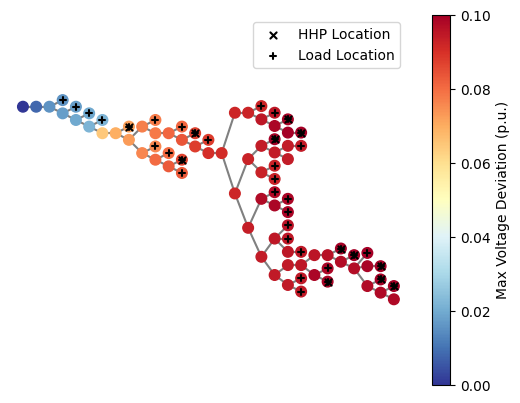

In [ ]:
import pandapower as pp
import pandapower.plotting as plot
import matplotlib.pyplot as plt
import numpy as np
import os


def plot_network_with_voltage_dev(net, max_voltage_dev):
    hp_own=model_inf.connect1["HP"].tolist()
    # if net.bus_geodata null，use simple_plot 
    if net.bus_geodata.empty:
        print("Generating layout using simple_plot...")
        fig, ax = plt.subplots()
        plot.simple_plot(net, plot_loads=True, ax=ax, show_plot=False)
        plt.close(fig)
    
    fig, ax = plt.subplots()
    
    
    lc = plot.create_line_collection(net, lines=net.line.index, color="grey", zorder=1)
    
    # set bus color based on max voltage deviation
    cmap = plt.get_cmap('RdYlBu_r')
    norm = plt.Normalize(vmin=min(max_voltage_dev), vmax=max(max_voltage_dev))
    colors = [cmap(norm(value)) for value in max_voltage_dev]
    
    # set all bus
    bus_size = 0.4
    bc = plot.create_bus_collection(
        net,
        buses=net.bus.index,
        size=bus_size,
        color=colors,
        zorder=2
    )
    
    # get HHP bus location, index of hp_own=1 puls n_bus -n_user
    offset = len(model_inf.network) + 1 - len(model_inf.connect1)
    hhp_buses = [i + offset for i, val in enumerate(hp_own) if val == 1]
    # makere sure the bus is in the net.bus.index
    hhp_buses = [bus for bus in hhp_buses if bus in net.bus.index]
    
    
    
    # collection
    collections = [lc, bc]
    
# add green triangle for HHP location
    if hhp_buses:
        hhp_x = net.bus_geodata.loc[hhp_buses, 'x']
        hhp_y = net.bus_geodata.loc[hhp_buses, 'y']
        ax.scatter(hhp_x, hhp_y, c='black', marker='x', s=20, zorder=3, label='HHP Location')
    
   
    collections = [lc, bc]
    
    # add load location
    if net.load.shape[0] != 0:
        load_buses = net.load.bus.values  
        load_x = net.bus_geodata.loc[load_buses, 'x']
        load_y = net.bus_geodata.loc[load_buses, 'y']
        ax.scatter(load_x, load_y, c='black', marker='+', s=20, zorder=3, label='Load Location')

    
    plot.draw_collections(collections, ax=ax)
    
    # add colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array(max_voltage_dev)
    plt.colorbar(sm, ax=ax, label='Max Voltage Deviation (p.u.)')
    
    
    plt.legend()
    
    if not os.path.exists('result'):
        os.makedirs('result')
    # plt.savefig('result/voltage_dev_plot.png', dpi=300, bbox_inches='tight')
    plt.savefig('result/voltage_dev_plot.svg', bbox_inches='tight')
    plt.show()

plot_network_with_voltage_dev(net, max_voltage_dev)

In [ ]:
model_inf.LoadPower.iloc[:,1:]
#help me sum the load power
model_inf.LoadPower.iloc[:,1:].sum(axis=1)

array([-0.01556154])

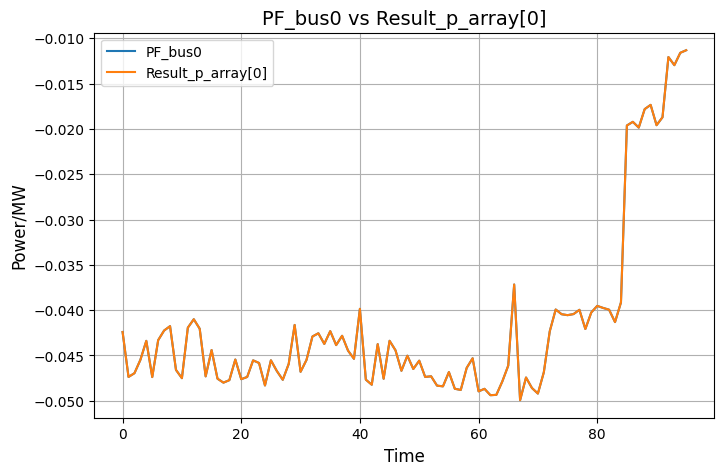

In [12]:
# compare PF_bus0 with Result_p_array[0] in every time step in a plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(PF_bus0, label='PF_bus0')
plt.plot(Result_p_array[0], label='Result_p_array[0]')
# add sum (Result_p_array[i] for i in range(1, n_bus)) to the plot
# plt.plot(-sum(Result_p_array[i] for i in range(1, n_bus)), label='Sum of Result_p_array[i]')
#plot the total load power in every time step
# plt.plot(-LoadPower.iloc[:,1:].sum(axis=1).values*1E-3, label='Total Load Power')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Power/MW', fontsize=12)
plt.title('PF_bus0 vs Result_p_array[0]', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
#check the transformer's power 
min_value = min(TransAva)
max_value = max(PFdiff)
# Check if the transformer power of the pf fit the congestion limit
if min_value < 0:    
    locations = [i for i, val in enumerate(TransAva) if val == min_value]
    print(f"Congestion Management Error: {min_value}")
    print(f"Locations of Errors: {locations}")
#calculate the difference between the pf and opf
print(f"The power flow validate the OPF result, the biggest difference is: {max_value}MW")

The power flow validate the OPF result, the biggest difference is: 3.656321740340418e-07MW
